[  0 292 480   0]
Best Performance by Model: 0
O O O 
O O O 
O O O 

Worst Performance by Model: 0
O O O 
O O O 
O O O 

Best Performance by Model: 1
X O O 
X O O 
X O O 

Worst Performance by Model: 1
O O O 
O O O 
X O O 

Best Performance by Model: 2
X X X 
X O O 
O O O 

Worst Performance by Model: 2
O X O 
X O O 
X O O 

Best Performance by Model: 3
O O O 
O O O 
O O O 

Worst Performance by Model: 3
X X O 
O X X 
X O X 



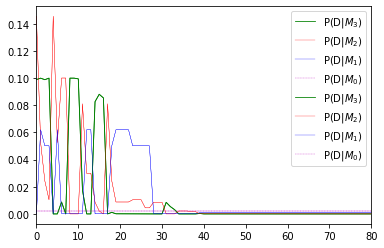

In [240]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)
print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    # print('Probability Mass is: ' +result[max[i][i]])
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    visualizeData(D[min[i]])

idx=indexAlgo(np.sum(result,axis=1))
plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
plt.legend()
idx=indexAlgo(np.sum(result,axis=1))
plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
plt.xlim(0,80)
plt.legend()
plt.show()


In [241]:
i=2

In [242]:
print('Probability Mass is: ' +result[max[i][i]])


IndexError: invalid index to scalar variable.

In [243]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)
print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +result[max[i]][i])
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    visualizeData(D[min[i]])

idx=indexAlgo(np.sum(result,axis=1))
plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
plt.legend()
idx=indexAlgo(np.sum(result,axis=1))
plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
plt.xlim(0,80)
plt.legend()
plt.show()


[  0 292 480 219]
Best Performance by Model: 0


TypeError: can only concatenate str (not "numpy.float64") to str

[  0  73  15 200]
Best Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Worst Performance by Model: 0
O O O 
O O O 
O O O 

Best Performance by Model: 1
Probability Mass is: 0.0779311078300752
O O X 
O O X 
O O X 

Worst Performance by Model: 1
O O O 
X O O 
X O O 

Best Performance by Model: 2
Probability Mass is: 0.14986436727552296
O O O 
O O X 
X X X 

Worst Performance by Model: 2
O O X 
O O X 
O X O 

Best Performance by Model: 3
Probability Mass is: 0.152035540809529
O X X 
O O X 
O O O 

Worst Performance by Model: 3
X O O 
O X X 
X X X 



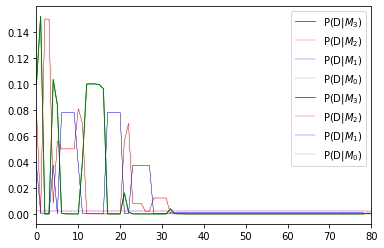

In [244]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)
print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    visualizeData(D[min[i]])

idx=indexAlgo(np.sum(result,axis=1))
plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
plt.legend()
idx=indexAlgo(np.sum(result,axis=1))
plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
plt.xlim(0,80)
plt.legend()
plt.show()


[  0 292 420   0]
Best Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Worst Performance by Model: 0
O O O 
O O O 
O O O 

Best Performance by Model: 1
Probability Mass is: 0.06862654198600988
X O O 
X O O 
X O O 

Worst Performance by Model: 1
O O O 
O O O 
O O X 

Best Performance by Model: 2
Probability Mass is: 0.10586482014301242
X X O 
X O O 
X O O 

Worst Performance by Model: 2
O O O 
O O O 
X X X 

Best Performance by Model: 3
Probability Mass is: 0.10005105878348816
O O O 
O O O 
O O O 

Worst Performance by Model: 3
X O O 
X X X 
O X X 



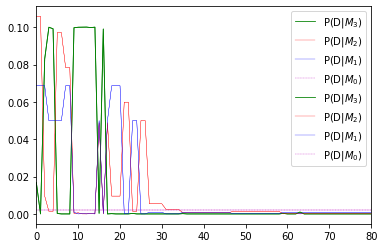

In [245]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)
print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    visualizeData(D[min[i]])

idx=indexAlgo(np.sum(result,axis=1))
plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
plt.legend()
idx=indexAlgo(np.sum(result,axis=1))
plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
plt.xlim(0,80)
plt.legend()
plt.show()


In [246]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

max = np.argmax(result,axis=0)

min = np.argmin(result,axis=0)
# print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[min[i]][i]))
    visualizeData(D[min[i]])
# idx=indexAlgo(np.sum(result,axis=1))
# plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
# plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
# plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
# plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
# plt.legend()
# idx=indexAlgo(np.sum(result,axis=1))
# plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
# plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
# plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
# plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
# plt.xlim(0,80)
# plt.legend()
# plt.show()


Best Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Worst Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Best Performance by Model: 1
Probability Mass is: 0.07919485806167277
O O X 
O O X 
O O X 

Worst Performance by Model: 1
Probability Mass is: 1.3264948366540577e-06
O O O 
X O O 
X O O 

Best Performance by Model: 2
Probability Mass is: 0.14286302493779607
X O O 
X O O 
X X O 

Worst Performance by Model: 2
Probability Mass is: 7.891494134511109e-18
O X X 
O O X 
O O O 

Best Performance by Model: 3
Probability Mass is: 0.1998124198703947
O O O 
O O O 
O O O 

Worst Performance by Model: 3
Probability Mass is: 1.2146798925709922e-59
X O X 
X X O 
O O X 



In [247]:
result

array([[1.95312500e-03, 3.33256086e-05, 3.43114332e-12, 1.99812420e-01],
       [1.95312500e-03, 1.67037808e-04, 6.52973143e-14, 6.63707528e-08],
       [1.95312500e-03, 3.33256086e-05, 5.84898031e-11, 2.65857833e-16],
       ...,
       [1.95312500e-03, 3.33256086e-05, 2.01278580e-13, 1.89204821e-22],
       [1.95312500e-03, 6.64877158e-06, 1.81479071e-10, 4.68265510e-06],
       [1.95312500e-03, 3.33256086e-05, 3.43114332e-12, 1.17127902e-17]])

In [248]:
result.shape

(512, 4)

In [249]:
np.sum(result,axis=1)

array([0.20179887, 0.00212023, 0.00198645, 0.0026597 , 0.00195983,
       0.00198645, 0.00196072, 0.16969642, 0.00212016, 0.00280288,
       0.00212016, 0.10223937, 0.00198645, 0.00212016, 0.00198645,
       0.00212348, 0.00198645, 0.00212016, 0.00198645, 0.00212016,
       0.00195983, 0.00198645, 0.00196067, 0.0020601 , 0.00212016,
       0.00279065, 0.00212016, 0.0027946 , 0.00198645, 0.00212016,
       0.00198645, 0.09988827, 0.00195978, 0.00198645, 0.00195983,
       0.00198645, 0.002002  , 0.00196067, 0.00276511, 0.13418209,
       0.00198645, 0.00212016, 0.00198645, 0.00212016, 0.00195983,
       0.00198645, 0.00196067, 0.00204061, 0.00195978, 0.00198645,
       0.00195983, 0.00198645, 0.002002  , 0.00196067, 0.00276511,
       0.10187609, 0.00198645, 0.00212016, 0.00198645, 0.00212016,
       0.00195983, 0.00198645, 0.00196067, 0.00427254, 0.00212016,
       0.00279064, 0.00212016, 0.00279065, 0.00198645, 0.00212016,
       0.00198645, 0.00212016, 0.00279064, 0.08120714, 0.00279

In [250]:
np.sum(result,axis=0)

array([1., 1., 1., 1.])

In [251]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

sum_evid=np.sum(result,axis=0)
print('Sum of the Evidence')

for i in len(sum_evid):
    print('Model '+str(i)+' :'+str(sum[i]))

max = np.argmax(result,axis=0)

min = np.argmin(result,axis=0)
# print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[min[i]][i]))
    visualizeData(D[min[i]])
# idx=indexAlgo(np.sum(result,axis=1))
# plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
# plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
# plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
# plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
# plt.legend()
# idx=indexAlgo(np.sum(result,axis=1))
# plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
# plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
# plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
# plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
# plt.xlim(0,80)
# plt.legend()
# plt.show()


Sum of the Evidence


TypeError: 'int' object is not iterable

In [252]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

sum_evid=np.sum(result,axis=0)
print('Sum of the Evidence')

for i in range(len(sum_evid)):
    print('Model '+str(i)+' :'+str(sum[i]))

max = np.argmax(result,axis=0)

min = np.argmin(result,axis=0)
# print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[min[i]][i]))
    visualizeData(D[min[i]])
# idx=indexAlgo(np.sum(result,axis=1))
# plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
# plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
# plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
# plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
# plt.legend()
# idx=indexAlgo(np.sum(result,axis=1))
# plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
# plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
# plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
# plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
# plt.xlim(0,80)
# plt.legend()
# plt.show()


Sum of the Evidence
Model 0 :1.0
Model 1 :0.9999999999999998
Model 2 :0.9999999999999998
Model 3 :1.0
Best Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Worst Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Best Performance by Model: 1
Probability Mass is: 0.06256599758240662
O O X 
O O X 
O O X 

Worst Performance by Model: 1
Probability Mass is: 0.00018625246871335532
O O O 
O O O 
O O X 

Best Performance by Model: 2
Probability Mass is: 0.1142256618543664
X X O 
X O O 
X O O 

Worst Performance by Model: 2
Probability Mass is: 9.599049431982509e-22
O O O 
O O X 
X O O 

Best Performance by Model: 3
Probability Mass is: 0.19715919775001473
X X X 
X X X 
X X X 

Worst Performance by Model: 3
Probability Mass is: 1.9615182572108157e-60
X O O 
X O X 
O X X 



In [253]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

sum_evid=np.sum(result,axis=0)
print('***Sum of the Evidence***')

for i in range(len(sum_evid)):
    print('Model '+str(i)+' :'+str(sum[i]))

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)

print()
# print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[min[i]][i]))
    visualizeData(D[min[i]])
# idx=indexAlgo(np.sum(result,axis=1))
# plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
# plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
# plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
# plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
# plt.legend()
# idx=indexAlgo(np.sum(result,axis=1))
# plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
# plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
# plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
# plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
# plt.xlim(0,80)
# plt.legend()
# plt.show()


***Sum of the Evidence***
Model 0 :1.0
Model 1 :0.9999999999999998
Model 2 :0.9999999999999998
Model 3 :1.0

Best Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Worst Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Best Performance by Model: 1
Probability Mass is: 0.07540620570873055
O O X 
O O X 
O O X 

Worst Performance by Model: 1
Probability Mass is: 3.879637450781972e-05
O O O 
X O O 
X O O 

Best Performance by Model: 2
Probability Mass is: 0.09998371719857768
X X X 
O O X 
O O O 

Worst Performance by Model: 2
Probability Mass is: 1.1664576668732317e-37
O O O 
O O O 
O O O 

Best Performance by Model: 3
Probability Mass is: 0.19976890794942484
O O X 
O X X 
X X X 

Worst Performance by Model: 3
Probability Mass is: 1.9486976670894075e-56
X X X 
X O X 
X X O 



***Sum of the Evidence***
Model 0 :1.0
Model 1 :0.9999999999999998
Model 2 :0.9999999999999998
Model 3 :1.0

Best Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Worst Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Best Performance by Model: 1
Probability Mass is: 0.07557791111550453
X O O 
X O O 
X O O 

Worst Performance by Model: 1
Probability Mass is: 3.143177864104635e-05
O O O 
O O X 
O O X 

Best Performance by Model: 2
Probability Mass is: 0.14064867428776343
O X X 
O O X 
O O X 

Worst Performance by Model: 2
Probability Mass is: 7.180335341822156e-25
X O O 
X O O 
X O O 

Best Performance by Model: 3
Probability Mass is: 0.19999317878309003
O O O 
O O O 
O O O 

Worst Performance by Model: 3
Probability Mass is: 7.656915945469753e-44
X O X 
O O O 
O X O 



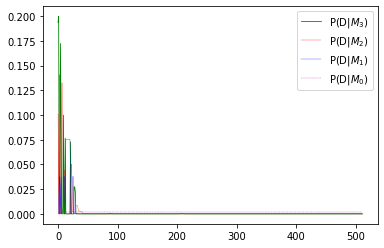

In [254]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def plotPerformance(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.legend()

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

sum_evid=np.sum(result,axis=0)
print('***Sum of the Evidence***')

for i in range(len(sum_evid)):
    print('Model '+str(i)+' :'+str(sum[i]))

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)

print()
# print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[min[i]][i]))
    visualizeData(D[min[i]])

idx=indexAlgo(np.sum(result,axis=1))

plotPerformance(idx,result)
# idx=indexAlgo(np.sum(result,axis=1))
# plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
# plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
# plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
# plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
# plt.xlim(0,80)
# plt.legend()
# plt.show()


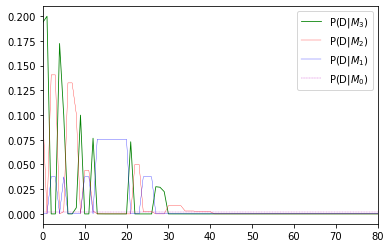

In [255]:
plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
plt.xlim(0,80)
plt.legend()


***Sum of the Evidence***
Model 0 :1.0
Model 1 :0.9999999999999998
Model 2 :0.9999999999999998
Model 3 :1.0

Best Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Worst Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Best Performance by Model: 1
Probability Mass is: 0.07494519962024489
O O X 
O O X 
O O X 

Worst Performance by Model: 1
Probability Mass is: 2.0815587408820935e-12
X O X 
O O O 
X O O 

Best Performance by Model: 2
Probability Mass is: 0.18955066029010223
X X O 
X O O 
X O O 

Worst Performance by Model: 2
Probability Mass is: 1.8902015321473667e-10
X X X 
O O X 
O O O 

Best Performance by Model: 3
Probability Mass is: 0.2000661391967554
X X X 
X X X 
X X X 

Worst Performance by Model: 3
Probability Mass is: 6.105976105841773e-52
O O O 
X X X 
X O O 



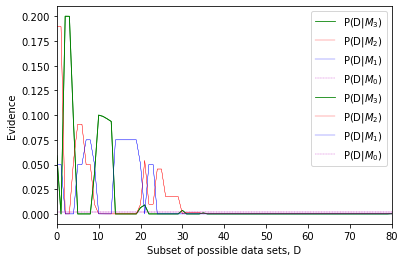

In [256]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def plotPerformance(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.xlabel('All data sets, D')
    plt.ylabel('Evidence')
    plt.legend()

def plotPerformance_max(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.8, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.xlabel('Subset of possible data sets, D')
    plt.ylabel('Evidence')
    plt.xlim(0,80)
    plt.legend()

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

sum_evid=np.sum(result,axis=0)
print('***Sum of the Evidence***')

for i in range(len(sum_evid)):
    print('Model '+str(i)+' :'+str(sum[i]))

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)

print()
# print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[min[i]][i]))
    visualizeData(D[min[i]])

idx=indexAlgo(np.sum(result,axis=1))
plotPerformance(idx,result)

plotPerformance_max(idx,result)
# plt.show()


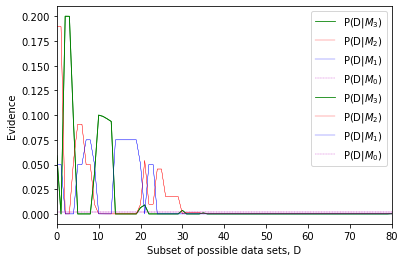

In [257]:
plotPerformance(idx,result)
plotPerformance_max(idx,result)


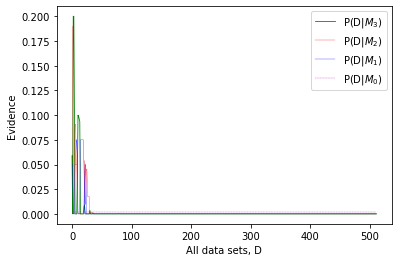

In [258]:
plotPerformance(idx,result)


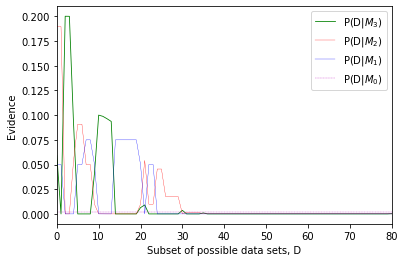

In [259]:
plotPerformance_max(idx,result)


In [260]:
max

array([  0,  73, 420, 511], dtype=int64)

In [261]:
plt.scatter(max)

TypeError: scatter() missing 1 required positional argument: 'y'

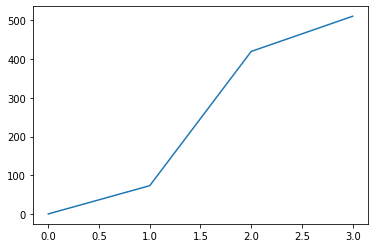

In [262]:
plt.plot(max)

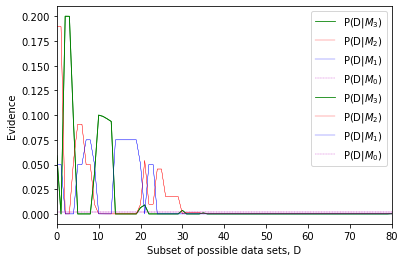

In [263]:
plotPerformance(idx,result)
plotPerformance_max(idx,result)


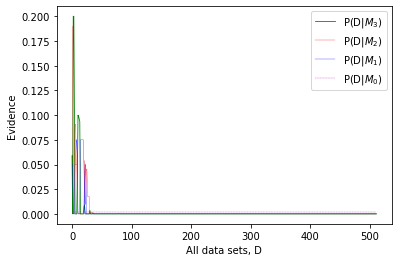

In [264]:
plotPerformance(idx,result)


In [265]:
model=3

In [266]:
mu=np.zeros(model)*5


In [267]:
mu

array([0., 0., 0.])

In [268]:
mu=np.ones(model)*5


In [269]:
mu

array([5., 5., 5.])

In [270]:
cov=np.eye(model)*1000


In [271]:
S=2

In [272]:
np.random.multivariate_normal(mu, cov, S)


array([[-18.34180629, -38.47803834, -14.69253343],
       [ 17.8133202 , -35.93157346, -29.0078845 ]])

In [273]:
mu=np.ones(model)*5
cov=np.random.rand(model,model)*1000


In [274]:
mu

array([5., 5., 5.])

In [275]:
cov

array([[124.54080621, 162.96457438, 288.52800856],
       [  3.87513049, 777.578383  , 531.33790912],
       [260.8791988 , 139.09438129, 567.48531855]])

In [276]:
np.random.multivariate_normal(mu, cov, S)


c:\Users\aniru\OneDrive\GIT\DD2434_AdvMachineLearning\Lab1\evidence.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  import itertools as it


array([[ 12.78132414, -18.33126613,  10.16994265],
       [ -3.54070727,  46.10754929,  15.90289673]])

In [277]:
mu=np.ones(model)*5
A = random.rand(model,model)
cov = np.dot(A,A.transpose())*1000


In [278]:
mu

array([5., 5., 5.])

In [279]:
cov

array([[1338.65758895, 1114.34107587, 1012.71121148],
       [1114.34107587, 1037.75671298,  726.55755407],
       [1012.71121148,  726.55755407,  889.43677933]])

In [280]:
np.random.multivariate_normal(mu, cov, S)


array([[ -9.94502103,   3.70213023, -18.01594919],
       [ 45.75774132,  34.68901897,  40.3617715 ]])

***Sum of the Evidence***
Model 0 :1.0
Model 1 :0.9999999999999998
Model 2 :0.9999999999999998
Model 3 :1.0

Best Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Worst Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Best Performance by Model: 1
Probability Mass is: 0.08529194289180764
X O O 
X O O 
X O O 

Worst Performance by Model: 1
Probability Mass is: 1.3639507347853154e-10
O O X 
O O O 
O O X 

Best Performance by Model: 2
Probability Mass is: 0.14736664809019412
O O O 
X O O 
X X X 

Worst Performance by Model: 2
Probability Mass is: 1.8348658748931842e-17
X O O 
X O O 
O X O 

Best Performance by Model: 3
Probability Mass is: 0.09999996399532879
X X X 
X X X 
X X X 

Worst Performance by Model: 3
Probability Mass is: 3.772554121019953e-40
X X X 
O O O 
X X O 



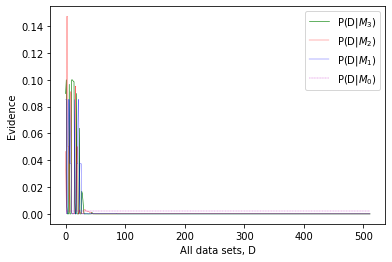

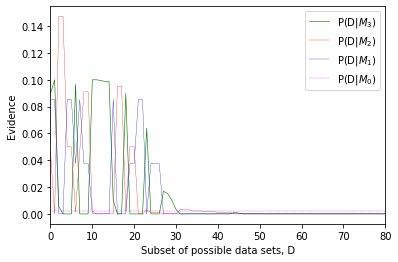

In [281]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy import random, linalg

def plotPerformance(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.6, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.xlabel('All data sets, D')
    plt.ylabel('Evidence')
    plt.legend()
    plt.show()

def plotPerformance_max(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.6, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.xlabel('Subset of possible data sets, D')
    plt.ylabel('Evidence')
    plt.xlim(0,80)
    plt.legend()
    plt.show()

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def getThetaComplex(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.ones(model)*5
        A = random.rand(model,model)
        cov = np.dot(A,A.transpose())*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

sum_evid=np.sum(result,axis=0)
print('***Sum of the Evidence***')

for i in range(len(sum_evid)):
    print('Model '+str(i)+' :'+str(sum[i]))

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)

print()
# print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[min[i]][i]))
    visualizeData(D[min[i]])

idx=indexAlgo(np.sum(result,axis=1))
plotPerformance(idx,result)
plotPerformance_max(idx,result)


Samples used:10
***Sum of the Evidence***
Model 0 :1.0
Model 1 :0.9999999999999998
Model 2 :0.9999999999999998
Model 3 :1.0

Best Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Worst Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Best Performance by Model: 1
Probability Mass is: 0.07499840110138752
X O O 
X O O 
X O O 

Worst Performance by Model: 1
Probability Mass is: 1.0430519828599216e-05
O O O 
X O O 
X O O 

Best Performance by Model: 2
Probability Mass is: 0.11521814245567441
O O X 
O O X 
O X X 

Worst Performance by Model: 2
Probability Mass is: 7.343696128255847e-22
O X O 
X O O 
X O X 

Best Performance by Model: 3
Probability Mass is: 0.20001658388910898
O O O 
O O O 
O O O 

Worst Performance by Model: 3
Probability Mass is: 2.4771478522336304e-49
O O X 
X O O 
X X X 



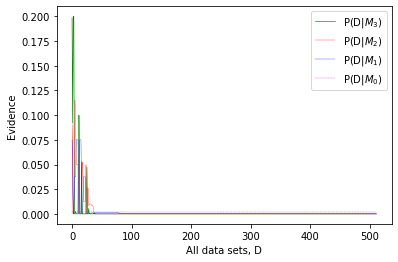

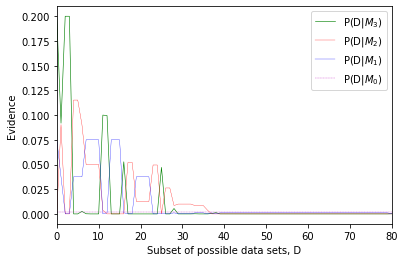

In [282]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy import random, linalg

def plotPerformance(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.6, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.xlabel('All data sets, D')
    plt.ylabel('Evidence')
    plt.legend()
    plt.show()

def plotPerformance_max(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.6, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.xlabel('Subset of possible data sets, D')
    plt.ylabel('Evidence')
    plt.xlim(0,80)
    plt.legend()
    plt.show()

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def getThetaComplex(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.ones(model)*5
        A = random.rand(model,model)
        cov = np.dot(A,A.transpose())*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

sum_evid=np.sum(result,axis=0)
print('Samples used:'+str(S))
print('***Sum of the Evidence***')

for i in range(len(sum_evid)):
    print('Model '+str(i)+' :'+str(sum[i]))

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)

print()
# print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[min[i]][i]))
    visualizeData(D[min[i]])

idx=indexAlgo(np.sum(result,axis=1))
plotPerformance(idx,result)
plotPerformance_max(idx,result)


In [283]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy import random, linalg

def plotPerformance(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.6, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.xlabel('All data sets, D')
    plt.ylabel('Evidence')
    plt.legend()
    plt.show()

def plotPerformance_max(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.6, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.xlabel('Subset of possible data sets, D')
    plt.ylabel('Evidence')
    plt.xlim(0,80)
    plt.legend()
    plt.show()

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def getThetaComplex(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.ones(model)*5
        A = random.rand(model,model)
        cov = np.dot(A,A.transpose())*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=10**8
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

sum_evid=np.sum(result,axis=0)
print('Samples used:'+str(S))
print('***Sum of the Evidence***')

for i in range(len(sum_evid)):
    print('Model '+str(i)+' :'+str(sum[i]))

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)

print()
# print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[min[i]][i]))
    visualizeData(D[min[i]])

idx=indexAlgo(np.sum(result,axis=1))
plotPerformance(idx,result)
plotPerformance_max(idx,result)


KeyboardInterrupt: 

Samples used:1000
***Sum of the Evidence***
Model 0 :1.0
Model 1 :0.9999999999999998
Model 2 :0.9999999999999998
Model 3 :1.0

Best Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Worst Performance by Model: 0
Probability Mass is: 0.001953125
O O O 
O O O 
O O O 

Best Performance by Model: 1
Probability Mass is: 0.06003322834950035
X O O 
X O O 
X O O 

Worst Performance by Model: 1
Probability Mass is: 4.757534156928347e-05
O O O 
X O O 
O O X 

Best Performance by Model: 2
Probability Mass is: 0.06556168554479214
X O O 
X O O 
X X O 

Worst Performance by Model: 2
Probability Mass is: 4.339345884219263e-07
X O X 
X O O 
O O X 

Best Performance by Model: 3
Probability Mass is: 0.11137919734143224
O O O 
O O O 
O O O 

Worst Performance by Model: 3
Probability Mass is: 1.6249015118867276e-13
O O O 
X X X 
O X O 



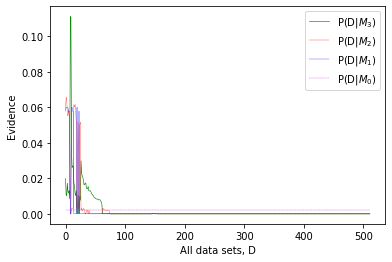

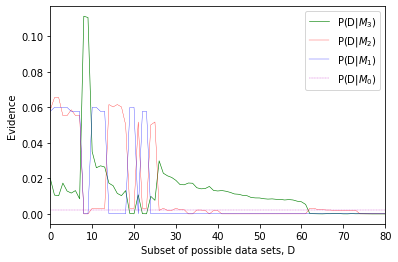

In [284]:
import itertools as it
from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy import random, linalg

def plotPerformance(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.6, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.xlabel('All data sets, D')
    plt.ylabel('Evidence')
    plt.legend()
    plt.show()

def plotPerformance_max(idx,result):
    plt.plot(result[idx,3],'g',linewidth=0.6, label= "P(D|$M_3$)")
    plt.plot(result[idx,2],'r', linewidth=0.3,label= "P(D|$M_2$)")
    plt.plot(result[idx,1],'b', linewidth=0.3,label= "P(D|$M_1$)")
    plt.plot(result[idx,0],'m--',linewidth=0.3, label ="P(D|$M_0$)")
    plt.xlabel('Subset of possible data sets, D')
    plt.ylabel('Evidence')
    plt.xlim(0,80)
    plt.legend()
    plt.show()

def indexAlgo(result):
    dist = distance.squareform(distance.pdist(result.reshape(-1,1), 'euclidean'))
    np.fill_diagonal(dist, np.inf)
    L = []  
    D = list(range(result.shape[0]))
    L.append(result.argmin())
    D.remove(L[-1])
    while len(D) > 0:
        # add d if dist from d to all other points in D
        # is larger than dist from d to L[-1]
        N = [d for d in D if dist[d, D].min() > dist[d, L[-1]]]
        if len(N) == 0:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmax()])
        D.remove(L[-1])
    # reverse the resulting index array
    return np.array(L)[::-1]

def generateD():
    x=list(it.product([-1,1], repeat=9))
    D = []
    for d in x:
        D.append(np.reshape(np.asarray(d), (3, 3)))
    return D 

def visualizeData(arr):
    for i in range(3):
        for j in range(3):
            if arr[i][j] == -1:
                print("O", end=" ")
            else:
                print("X", end=" ")
        print()
    print()   

def modelsCal(model,theta,t):
    p=1
    if(model==0):
        p= 1/512
    elif(model==1):
        for i in range(3):
            for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1)))
                p = p * 1/(1+e)
    elif(model==2):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)))
                p = p * 1/(1+e)
    elif(model==3):
        for i in range(3):
          for j in range(3):
                e = np.exp(-t[i, j]*(theta[0]*(j-1) + theta[1]*(1-i)+theta[2]))
                p = p * 1/(1+e)
    return p

def getTheta(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.zeros(model)
        cov=np.eye(model)*1000
        return np.random.multivariate_normal(mu, cov, S)

def getThetaComplex(model,S):
    theta=[]
    if(model==0):
        return theta
    else:
        mu=np.ones(model)*5
        A = random.rand(model,model)
        cov = np.dot(A,A.transpose())*1000
        return np.random.multivariate_normal(mu, cov, S)

def computeEvidence(model,sample,data,theta):
    p=0
    for i in range(sample):
        p+=modelsCal(model,theta[i],data)
    return p/sample

S=1000
thetaM1=getTheta(1,S)
thetaM2=getTheta(2,S)
thetaM3=getTheta(3,S)
D=generateD()
result=np.zeros([512,4])

for m in range(4):
    for i in range(512):
        if (m==0):
            result[i][m]=1/512
        elif (m==1):
            result[i][m]=computeEvidence(m,S,D[i],thetaM1)
        elif (m==2):
            result[i][m]=computeEvidence(m,S,D[i],thetaM2)
        elif (m==3):
            result[i][m]=computeEvidence(m,S,D[i],thetaM3)  

sum_evid=np.sum(result,axis=0)
print('Samples used:'+str(S))
print('***Sum of the Evidence***')

for i in range(len(sum_evid)):
    print('Model '+str(i)+' :'+str(sum[i]))

max = np.argmax(result,axis=0)
min = np.argmin(result,axis=0)

print()
# print(max)

for i in range(4):
    print('Best Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[max[i]][i]))
    visualizeData(D[max[i]])
    print('Worst Performance by Model: ' +str(i))
    print('Probability Mass is: ' +str(result[min[i]][i]))
    visualizeData(D[min[i]])

idx=indexAlgo(np.sum(result,axis=1))
plotPerformance(idx,result)
plotPerformance_max(idx,result)
